# Lesson 6 Assignment - Advertising Sales Regression

## Author - Lawrence Huang



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.formula.api as sm
import seaborn as sns

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0).reset_index(drop=True)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
# scale features, store as new columns in ad_data
scaler = StandardScaler().fit(ad_data[['TV', 'radio', 'newspaper']])
ad_data[['TV_scaled', 'radio_scaled', 'newspaper_scaled']] = pd.DataFrame(scaler.transform(ad_data[['TV', 'radio', 'newspaper']]))

# check scaling: mean, std expected to be 0, 1
print('scaled features mean:')
print(ad_data[['TV_scaled', 'radio_scaled', 'newspaper_scaled']].mean())
print('\nscaled features standard deviation:')
print(ad_data[['TV_scaled', 'radio_scaled', 'newspaper_scaled']].std())

scaled features mean:
TV_scaled           1.104672e-16
radio_scaled       -4.413137e-16
newspaper_scaled    2.220446e-16
dtype: float64

scaled features standard deviation:
TV_scaled           1.002509
radio_scaled        1.002509
newspaper_scaled    1.002509
dtype: float64


<b>Linear regression 1: TV advertising</b>

Outputs:
1. Produce a labeled graph showing the best fit line with the data points:


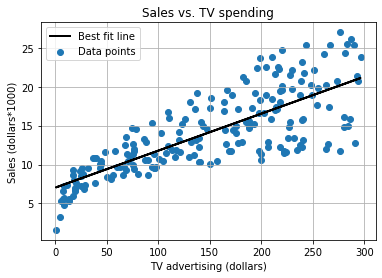

from sklearn:
Intercept: 7.03259
Slope : 0.04754
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        11:34:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

In [4]:
# since there is only 1 feature, first try no feature scaling

# 1. using sklearn
# First initialize the model.
regressor = LinearRegression()

# Fit the model to the data
X = ad_data['TV'].values
X = X.reshape(-1, 1)
y = ad_data['sales'].values
y = y.reshape(-1, 1)
regressor.fit(X,y)

# Get predictions
y_pred = regressor.predict(X)

# function to plot data and regression line
def get_plot(col):
    fig, ax = plt.subplots()
    ax.scatter(X, y, label='Data points')
    ax.grid(True)
    ax.plot(X, y_pred, linewidth=2, color='k', label='Best fit line')
    ax.set_xlabel('{} advertising (dollars)'.format(col))
    ax.set_ylabel('Sales (dollars*1000)')
    ax.legend()
    plt.title('Sales vs. {} spending'.format(col))
    plt.show()

# plot data and regression line
print('Outputs:')
print('1. Produce a labeled graph showing the best fit line with the data points:')
get_plot('TV')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('from sklearn:')
print('Intercept: {0:.5f}'.format(regressor.intercept_[0]))
print('Slope : {0:.5f}'.format(regressor.coef_[0][0]))

# 2. confirm using statsmodels
# initialize and fit model
ols_model = sm.ols(formula = 'sales ~ TV', data=ad_data)
results = ols_model.fit()

# model summary
print(results.summary())

# Get slope (m) and y-intercept (b)
print('\nfrom statsmodels:')
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.TV))

# Intrepretation:
print('\n2. Interpret both the slope and y-intercept:')
print('Y Intercept: When x (TV advertising) is zero dollars, y (sales) is {0:.5f} K dollars'.format(regressor.intercept_[0]))
print('Slope: When we increase x (TV advertising) by 1 dollar then we expect that y (sales) will go up by {0:.5f} K dollars'.format(regressor.coef_[0][0]))

Outputs:
1. Produce a labeled graph showing the best fit line with the data points:


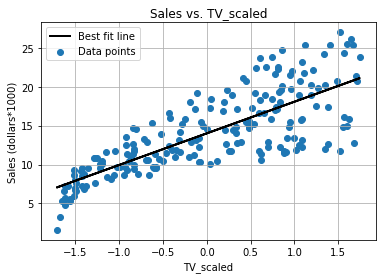

from sklearn:
Intercept: 14.02250
Slope : 4.07101

from statsmodels:
Intercept: 14.02250
Slope : 4.07101

2. Interpret both the slope and y-intercept:
Y Intercept: When TV advertising is at its mean value (i.e. when TV_scaled is 0), y (sales) is 14.02250 K dollars
Slope: When we increase x (TV_scaled) by 1 (i.e. 1 standard deviation of TV) then we expect that y (sales) will go up by 4.07101 K dollars

After scaling back, the intercept and slope matches the unscaled model.
Intercept (original scale): 7.03259
Slope (original scale): 0.04754


In [5]:
# repeat with feature scaling

# 1. using sklearn
# First initialize the model.
regressor = LinearRegression()

# Fit the model to the data
X = ad_data['TV_scaled'].values
X = X.reshape(-1, 1)
y = ad_data['sales'].values
y = y.reshape(-1, 1)
regressor.fit(X,y)

# Get predictions
y_pred = regressor.predict(X)

# function to plot data and regression line
def get_plot_scaled(col):
    fig, ax = plt.subplots()
    ax.scatter(X, y, label='Data points')
    ax.grid(True)
    ax.plot(X, y_pred, linewidth=2, color='k', label='Best fit line')
    ax.set_xlabel('{}'.format(col))
    ax.set_ylabel('Sales (dollars*1000)')
    ax.legend()
    plt.title('Sales vs. {}'.format(col))
    plt.show()

# plot data and regression line
print('Outputs:')
print('1. Produce a labeled graph showing the best fit line with the data points:')
get_plot_scaled('TV_scaled')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('from sklearn:')
print('Intercept: {0:.5f}'.format(regressor.intercept_[0]))
print('Slope : {0:.5f}'.format(regressor.coef_[0][0]))

# 2. confirm using statsmodels
# initialize and fit model
ols_model = sm.ols(formula = 'sales ~ TV_scaled', data=ad_data)
results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('\nfrom statsmodels:')
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.TV_scaled))

# Intrepretation:
print('\n2. Interpret both the slope and y-intercept:')
print('Y Intercept: When TV advertising is at its mean value (i.e. when TV_scaled is 0), y (sales) is {0:.5f} K dollars'.format(regressor.intercept_[0]))
print('Slope: When we increase x (TV_scaled) by 1 (i.e. 1 standard deviation of TV) then we expect that y (sales) will go up by {0:.5f} K dollars'.format(regressor.coef_[0][0]))

# inverse scale the intercept and slope
print('\nAfter scaling back, the intercept and slope matches the unscaled model.')
intercept_orig_scale = regressor.intercept_[0]-scaler.mean_[0]/scaler.scale_[0]*regressor.coef_[0][0]
print('Intercept (original scale): {0:.5f}'.format(intercept_orig_scale))
slope_orig_scale = regressor.coef_[0][0]/scaler.scale_[0]  
print('Slope (original scale): {0:.5f}'.format(slope_orig_scale))

<b>Linear regression 2: radio advertising</b>

Outputs:
1. Produce a labeled graph showing the best fit line with the data points:


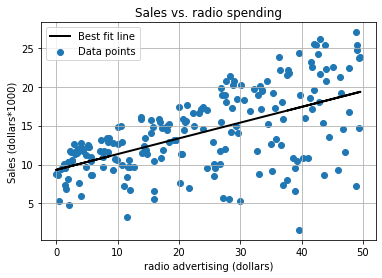

from sklearn:
Intercept: 9.31164
Slope : 0.20250
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           4.35e-19
Time:                        11:34:14   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

In [6]:
# since there is only 1 feature, first try no feature scaling

# 1. using sklearn
# First initialize the model.
regressor = LinearRegression()

# Fit the model to the data
X = ad_data['radio'].values
X = X.reshape(-1, 1)
y = ad_data['sales'].values
y = y.reshape(-1, 1)
regressor.fit(X,y)

# Get predictions
y_pred = regressor.predict(X)

# plot data and regression line
print('Outputs:')
print('1. Produce a labeled graph showing the best fit line with the data points:')
get_plot('radio')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('from sklearn:')
print('Intercept: {0:.5f}'.format(regressor.intercept_[0]))
print('Slope : {0:.5f}'.format(regressor.coef_[0][0]))

# 2. confirm using statsmodels
# initialize and fit model
ols_model = sm.ols(formula = 'sales ~ radio', data=ad_data)
results = ols_model.fit()

# model summary
print(results.summary())

# Get slope (m) and y-intercept (b)
print('\nfrom statsmodels:')
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.radio))

# Intrepretation:
print('\n2. Interpret both the slope and y-intercept:')
print('Y Intercept: When x (radio advertising) is zero dollars, y (sales) is {0:.5f} K dollars'.format(regressor.intercept_[0]))
print('Slope: When we increase x (radio advertising) by 1 dollar then we expect that y (sales) will go up by {0:.5f} K dollars'.format(regressor.coef_[0][0]))

Outputs:
1. Produce a labeled graph showing the best fit line with the data points:


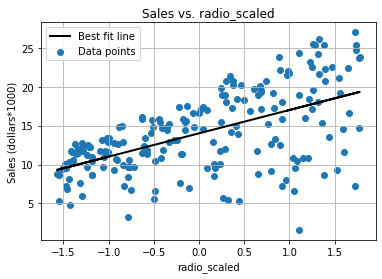

from sklearn:
Intercept: 14.02250
Slope : 2.99889

from statsmodels:
Intercept: 14.02250
Slope : 2.99889

2. Interpret both the slope and y-intercept:
Y Intercept: When radio advertising is at its mean value (i.e. when radio_scaled is 0), y (sales) is 14.02250 K dollars
Slope: When we increase x (radio_scaled) by 1 (i.e. 1 standard deviation of radio) then we expect that y (sales) will go up by 2.99889 K dollars

After scaling back, the intercept and slope matches the unscaled model.
Intercept (original scale): 9.31164
Slope (original scale): 0.20250


In [7]:
# repeat with feature scaling

# 1. using sklearn
# First initialize the model.
regressor = LinearRegression()

# Fit the model to the data
X = ad_data['radio_scaled'].values
X = X.reshape(-1, 1)
y = ad_data['sales'].values
y = y.reshape(-1, 1)
regressor.fit(X,y)

# Get predictions
y_pred = regressor.predict(X)

# plot data and regression line
print('Outputs:')
print('1. Produce a labeled graph showing the best fit line with the data points:')
get_plot_scaled('radio_scaled')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('from sklearn:')
print('Intercept: {0:.5f}'.format(regressor.intercept_[0]))
print('Slope : {0:.5f}'.format(regressor.coef_[0][0]))

# 2. confirm using statsmodels
# initialize and fit model
ols_model = sm.ols(formula = 'sales ~ radio_scaled', data=ad_data)
results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('\nfrom statsmodels:')
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.radio_scaled))

# Intrepretation:
print('\n2. Interpret both the slope and y-intercept:')
print('Y Intercept: When radio advertising is at its mean value (i.e. when radio_scaled is 0), y (sales) is {0:.5f} K dollars'.format(regressor.intercept_[0]))
print('Slope: When we increase x (radio_scaled) by 1 (i.e. 1 standard deviation of radio) then we expect that y (sales) will go up by {0:.5f} K dollars'.format(regressor.coef_[0][0]))

# inverse scale the intercept and slope
print('\nAfter scaling back, the intercept and slope matches the unscaled model.')
intercept_orig_scale = regressor.intercept_[0]-scaler.mean_[1]/scaler.scale_[1]*regressor.coef_[0][0]
print('Intercept (original scale): {0:.5f}'.format(intercept_orig_scale))
slope_orig_scale = regressor.coef_[0][0]/scaler.scale_[1]  
print('Slope (original scale): {0:.5f}'.format(slope_orig_scale))

<b>Linear regression 3: newspaper advertising</b>

Outputs:
1. Produce a labeled graph showing the best fit line with the data points:


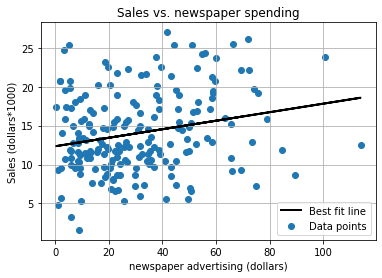

from sklearn:
Intercept: 12.35141
Slope : 0.05469
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 30 Jul 2019   Prob (F-statistic):            0.00115
Time:                        11:34:15   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

In [8]:
# since there is only 1 feature, first try no feature scaling

# 1. using sklearn
# First initialize the model.
regressor = LinearRegression()

# Fit the model to the data
X = ad_data['newspaper'].values
X = X.reshape(-1, 1)
y = ad_data['sales'].values
y = y.reshape(-1, 1)
regressor.fit(X,y)

# Get predictions
y_pred = regressor.predict(X)

# plot data and regression line
print('Outputs:')
print('1. Produce a labeled graph showing the best fit line with the data points:')
get_plot('newspaper')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('from sklearn:')
print('Intercept: {0:.5f}'.format(regressor.intercept_[0]))
print('Slope : {0:.5f}'.format(regressor.coef_[0][0]))

# 2. confirm using statsmodels
# initialize and fit model
ols_model = sm.ols(formula = 'sales ~ newspaper', data=ad_data)
results = ols_model.fit()

# model summary
print(results.summary())

# Get slope (m) and y-intercept (b)
print('\nfrom statsmodels:')
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.newspaper))

# Intrepretation:
print('\n2. Interpret both the slope and y-intercept:')
print('Y Intercept: When x (newspaper advertising) is zero dollars, y (sales) is {0:.5f} K dollars'.format(regressor.intercept_[0]))
print('Slope: When we increase x (newspaper advertising) by 1 dollar then we expect that y (sales) will go up by {0:.5f} K dollars'.format(regressor.coef_[0][0]))

Outputs:
1. Produce a labeled graph showing the best fit line with the data points:


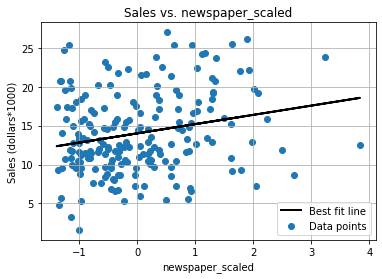

from sklearn:
Intercept: 14.02250
Slope : 1.18816

from statsmodels:
Intercept: 14.02250
Slope : 1.18816

2. Interpret both the slope and y-intercept:
Y Intercept: When newspaper advertising is at its mean value (i.e. when newspaper_scaled is 0), y (sales) is 14.02250 K dollars
Slope: When we increase x (newspaper_scaled) by 1 (i.e. 1 standard deviation of newspaper) then we expect that y (sales) will go up by 1.18816 K dollars

After scaling back, the intercept and slope matches the unscaled model.
Intercept (original scale): 12.35141
Slope (original scale): 0.05469


In [9]:
# repeat with feature scaling

# 1. using sklearn
# First initialize the model.
regressor = LinearRegression()

# Fit the model to the data
X = ad_data['newspaper_scaled'].values
X = X.reshape(-1, 1)
y = ad_data['sales'].values
y = y.reshape(-1, 1)
regressor.fit(X,y)

# Get predictions
y_pred = regressor.predict(X)

# plot data and regression line
print('Outputs:')
print('1. Produce a labeled graph showing the best fit line with the data points:')
get_plot_scaled('newspaper_scaled')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('from sklearn:')
print('Intercept: {0:.5f}'.format(regressor.intercept_[0]))
print('Slope : {0:.5f}'.format(regressor.coef_[0][0]))

# 2. confirm using statsmodels
# initialize and fit model
ols_model = sm.ols(formula = 'sales ~ newspaper_scaled', data=ad_data)
results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('\nfrom statsmodels:')
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.newspaper_scaled))

# Intrepretation:
print('\n2. Interpret both the slope and y-intercept:')
print('Y Intercept: When newspaper advertising is at its mean value (i.e. when newspaper_scaled is 0), y (sales) is {0:.5f} K dollars'.format(regressor.intercept_[0]))
print('Slope: When we increase x (newspaper_scaled) by 1 (i.e. 1 standard deviation of newspaper) then we expect that y (sales) will go up by {0:.5f} K dollars'.format(regressor.coef_[0][0]))

# inverse scale the intercept and slope
print('\nAfter scaling back, the intercept and slope matches the unscaled model.')
intercept_orig_scale = regressor.intercept_[0]-scaler.mean_[2]/scaler.scale_[2]*regressor.coef_[0][0]
print('Intercept (original scale): {0:.5f}'.format(intercept_orig_scale))
slope_orig_scale = regressor.coef_[0][0]/scaler.scale_[2]  
print('Slope (original scale): {0:.5f}'.format(slope_orig_scale))

<b>Regression 4: includes all 3 features: (a) TV, (b) radio, and (c) newspaper.</b>

In [10]:
# 1. using sklearn
# First initialize the model.
regressor = LinearRegression()

# Fit the model to the data
X = ad_data[['TV_scaled', 'radio_scaled', 'newspaper_scaled']]
y = ad_data['sales'].values
y = y.reshape(-1, 1)
regressor.fit(X,y)

# Get predictions
y_pred = regressor.predict(X)

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Partial slope and the intercept parameters:')
print('Intercept: {0:.5f}'.format(regressor.intercept_[0]))
print('TV_scaled Slope : {0:.5f}'.format(regressor.coef_[0][0]))
print('radio_scaled Slope : {0:.5f}'.format(regressor.coef_[0][1]))
print('newspaper_scaled Slope : {0:.5f}'.format(regressor.coef_[0][2]))

Partial slope and the intercept parameters:
Intercept: 14.02250
TV_scaled Slope : 3.91925
radio_scaled Slope : 2.79206
newspaper_scaled Slope : -0.02254


In [11]:
# 2. statsmodels
ols_model = sm.ols('sales ~ TV_scaled + radio_scaled + newspaper_scaled', data=ad_data)
results = ols_model.fit()
print(results.summary())

# Get slope (m) and y-intercept (b)
print('\nIntercept: {0:.5f}'.format(results.params.Intercept))
print('Slope TV_scaled: {0:.5f}'.format(results.params.TV_scaled))
print('Slope radio_scaled: {0:.5f}'.format(results.params.radio_scaled))
print('Slope newspaper_scaled: {0:.5f}'.format(results.params.newspaper_scaled))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.58e-96
Time:                        11:34:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.0225      0.119  

<b>1. Interpret each partial slope and the intercept parameters.</b>

<b>Partial slopes:</b> interpretation of the scaled and unscaled coefficients
<ul>
    <li>
Slope TV_scaled: When we increase TV_scaled by 1 (i.e. 1 standard deviation of TV advertising) then we expect that sales will go up by 3.91925 K dollars, assuming that radio and newspaper advertising are fixed.
    </li>
    <li>
Slope radio_scaled: When we increase radio_scaled by 1 (i.e. 1 standard deviation of radio advertising) then we expect that sales will go up by 2.79206 K dollars, assuming that TV and newspaper advertising are fixed.
    </li>
    <li>
Slope newspaper_scaled: When we increase newspaper_scaled by 1 (i.e. 1 standard deviation of newspaper advertising) then we expect that sales will go down by 0.02254 K dollars, assuming that TV and radio advertising are fixed.
    </li>
    <li>
Note that from the model summary, the coefficient for newspaper_scaled is not statistically different from 0 (p=0.860; fail to reject the null hypothesis that the coefficient is 0). Thus, changes in newspaper advertisement is not likely to be associated with changes in sales.
    </li>
    </ul>
    

In [12]:
# partial slope
# we can recompute original (unscaled) coefficients by dividing by the scale of the feature
print('TV Slope (original scale): {0:.5f}'.format(regressor.coef_[0][0]/scaler.scale_[0]))
print('radio Slope (original scale) : {0:.5f}'.format(regressor.coef_[0][1]/scaler.scale_[1]))
print('newspaper Slope (original scale): {0:.5f}'.format(regressor.coef_[0][2]/scaler.scale_[2]))

TV Slope (original scale): 0.04576
radio Slope (original scale) : 0.18853
newspaper Slope (original scale): -0.00104



We can transform the coefficient back to the original scale by dividing by the scale of the feature.
<ul>
    <li>
When we increase TV by 1 dollar then we expect that sales will go up by 0.04576 K dollars, assuming that radio and newspaper advertising are fixed.
    </li>
    <li>        
When we increase radio by 1 dollar then we expect that sales will go up by 0.18853 K dollars, assuming that TV and newspaper advertising are fixed.
    </li>
    <li>
When we increase newspaper by 1 dollar then we expect that sales will go up by -0.00104 K dollars, assuming that TV and radio advertising are fixed.
    </li>
    <li>
However, as discussed above, changes in newspaper advertisement is not likely to be associated with changes in sales, since its coefficient is not statistically different from 0.      
    </li>
    </ul>
    



<b>Intercept:</b> When all scaled features are zero (i.e. TV_scaled, radio_scaled, newspaper_scaled are all zero), sales is 14.02 K dollars.<br>
In other words, this is the expected sales when all feature values are set to their means.

In [13]:
# we can find the unscaled intercept
print('Intercept (original scale): {0:.5f}'.format(regressor.intercept_[0]-np.sum(scaler.mean_/scaler.scale_*regressor.coef_)))

Intercept (original scale): 2.93889


When all features are zero (i.e. TV, radio, newspaper advertising are all zero), sales is 2.94 K dollars.

<b>2. Interpret the adjusted R-squared.</b>

In [14]:
n = 200 # number of data samples
k = 3 # number of model coefficients
print('from sklearn (using r2_score):')
print('R2: {}'.format(r2_score(y, y_pred)))
adjr2 = 1-(1-r2_score(y, y_pred))*(n-1)/(n-k-1)
print('Adjusted R2: {}'.format(adjr2,3))

print('\nfrom statsmodels:')
print('Adjusted R2: {}'.format(results.rsquared_adj))

from sklearn (using r2_score):
R2: 0.8972106381789522
Adjusted R2: 0.8956373316204668

from statsmodels:
Adjusted R2: 0.8956373316204668


$R^2$ is the fraction of the variance of the original data explained by the model. A model that perfectly explains the data has $R^2 = 1$. A model which does not explain the data at all has $R^2 = 0$.

However, $R^2$ is generally non-decreasing when model paremeters are added, and a model with more terms may appear to have a better fit simply because it has more terms.

$R^2_{adj}$ adjusts for the number of model parameters (e.g. 3 in this model). Without this adjustment we will get a false sense of model performance as the model parameters increase. $R^2_{adj}$ increases only if the new feature improves the model more than would be expected by chance. It decreases when a feature improves the model by less than expected by chance. 

Here, $R^2_{adj}$ of 0.896 indicates that the model explains 89.6% of the variance of the original data and is thus a good fit.

<b>3. Find and report the mean-squared error.</b>

The mean squared error (MSE) is the mean of the squares of the errors. 

From the course notebook, root mean squared error is written as:
$$RMSE = \sqrt{ \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}}$$
From that, the mean squared error can be written as:
$$MSE = \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}$$
where:

$$
n = number\ of\ data\ samples\\
y_i = ith\ data\ value\\
\\\hat{y_i} = regression\ estimate\ of\ y_i\\
SSR = sum\ square\ residual\ = \Sigma_i{(y_i - \hat{y_i})^2}$$

In [15]:
# sklearn 
print('from sklearn (using mean_squared_error):')
print('MSE: {0:.3f}'.format(mean_squared_error(y, y_pred)))

# check using true and predicted y values from sklearn model
MSE_check = np.mean((y-y_pred) ** 2)
print('\nManual computation from y_true (yi) and y_pred (yhat i): {0:.3f}'.format(MSE_check))

# statsmodel
print('\nfrom statsmodels:')
n = 200 # number of data samples
print('MSE: {0:.3f}'.format(results.ssr/n)) # using formula above

from sklearn (using mean_squared_error):
MSE: 2.784

Manual computation from y_true (yi) and y_pred (yhat i): 2.784

from statsmodels:
MSE: 2.784


Interpretation: MSE, the average squared difference between the estimated (predicted) values and the observed (true) values, is a measure of regression model performance. We want to minimize MSE (values closer to zero are better).